In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import datetime as date
import matplotlib.pyplot as plt

In [2]:
startdate = date.datetime(2019, 3, 20)
enddate = date.datetime(2020, 3, 20)
tag = 'GOOGL'
data = pdr.get_data_yahoo(tag, start = startdate, end = enddate)

In [3]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-20,1229.989990,1199.589966,1201.400024,1226.430054,2075400,1226.430054
2019-03-21,1236.439941,1216.579956,1220.000000,1236.130005,1407500,1236.130005
2019-03-22,1233.630005,1206.000000,1228.849976,1207.650024,1721100,1207.650024
2019-03-25,1209.439941,1190.000000,1199.560059,1197.380005,1378800,1197.380005
2019-03-26,1207.650024,1181.760010,1205.189941,1189.839966,1537600,1189.839966


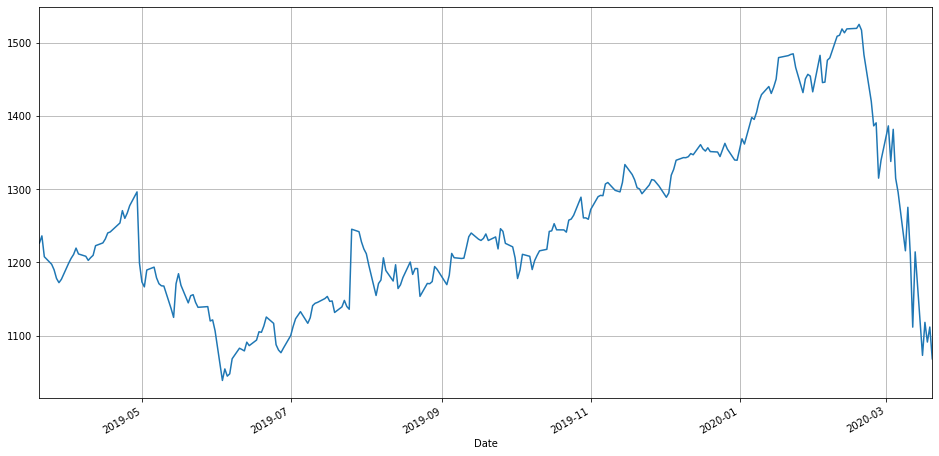

In [4]:
%matplotlib inline 
fig = plt.figure(figsize = (16,8))
data.Close.plot()
plt.grid()

In [5]:
def ROC(df, n):
    M = df['Close'].diff(n - 1)
    N = df['Close'].shift(n - 1)
    ROC = pd.Series(M/N, name = 'ROC_' + str(n))
    df = df.join(ROC)
    Cr = pd.Series(df['Close'].shift(1), name = 'Cr')
    df = df.join(Cr)
    ROCr = pd.Series(ROC.shift(1), name = 'ROC_' + str(n) + '_r')
    df = df.join(ROCr)
    df['Recomendación'] = '-'
    
    df.loc[((ROC > 0) & (ROCr < 0)), 'Recomendación'] = 'Se recomienda COMPRAR la acción.'
    df.loc[((ROC < 0) & (ROCr > 0)), 'Recomendación'] = 'Se recomienda VENDER la acción.'
    df.loc[((df['Close'] < Cr) & ((ROC > 0) & (ROCr < 0) & (ROC > ROCr))), 'Recomendación'] = 'Se recomienda COMPRAR la acción. (DIV)'
    df.loc[((df['Close'] > Cr) & ((ROC < 0) & (ROCr > 0) & (ROC < ROCr))), 'Recomendación'] = 'Se recomienda VENDER la acción. (DIV)'    
    
    return df

In [6]:
df2 = ROC(data, 10)

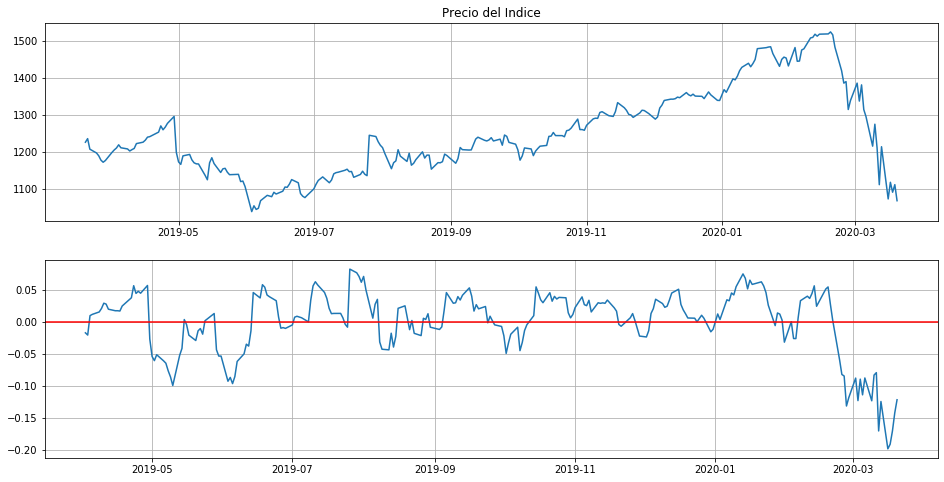

,Close,ROC_10,Recomendación
Date,,,
2019-04-04,1219.449951,0.009771,Se recomienda COMPRAR la acción.
2019-04-30,1198.959961,-0.026747,Se recomienda VENDER la acción.
2019-05-15,1170.800049,0.003678,Se recomienda COMPRAR la acción.
2019-05-16,1184.500000,-0.004245,Se recomienda VENDER la acción. (DIV)
2019-05-24,1138.609985,0.001777,Se recomienda COMPRAR la acción. (DIV)
2019-05-29,1119.939941,-0.043440,Se recomienda VENDER la acción.
2019-06-14,1086.300049,0.045786,Se recomienda COMPRAR la acción. (DIV)
2019-06-26,1080.319946,-0.009798,Se recomienda VENDER la acción.
2019-07-02,1112.599976,0.007324,Se recomienda COMPRAR la acción.


In [7]:
fig = plt.figure(figsize = (16,8))
plt.subplot(2, 1, 1)
plt.plot(df2.Close)
plt.title('Precio del Indice')
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(df2.ROC_10)
plt.axhline(y=0, color= 'r')
plt.grid()
plt.show()
df2.loc[df2['Recomendación'] != '-',['Close', 'ROC_10', 'Recomendación']]
#df2[['Close', 'ROC_10', 'Recomendación']]